# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API Key
from config import weather_api

# # Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# # # Output File (CSV)
output_data_file = "output_data/cities.csv"

# # # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [160]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [161]:
response_json = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for x in range(len(cities)):
    print(f"Processing Record {x} for City: {cities[x]}")                                             
    weather_response = requests.get(url + "appid=" + weather_api + "&q=" + str(cities[x]))                          
    response_json.append(weather_response.json())

    
    

Processing Record 0 for City: marsaxlokk
Processing Record 1 for City: mount gambier
Processing Record 2 for City: saint-francois
Processing Record 3 for City: gohpur
Processing Record 4 for City: cabedelo
Processing Record 5 for City: vardo
Processing Record 6 for City: punta arenas
Processing Record 7 for City: cape town
Processing Record 8 for City: butaritari
Processing Record 9 for City: male
Processing Record 10 for City: qaanaaq
Processing Record 11 for City: bluff
Processing Record 12 for City: busselton
Processing Record 13 for City: rikitea
Processing Record 14 for City: san patricio
Processing Record 15 for City: koslan
Processing Record 16 for City: buzmeyin
Processing Record 17 for City: carnarvon
Processing Record 18 for City: arraial do cabo
Processing Record 19 for City: cidreira
Processing Record 20 for City: bandarbeyla
Processing Record 21 for City: komsomolskiy
Processing Record 22 for City: husavik
Processing Record 23 for City: barrow
Processing Record 24 for City

Processing Record 202 for City: waddan
Processing Record 203 for City: saint george
Processing Record 204 for City: elko
Processing Record 205 for City: hambantota
Processing Record 206 for City: najran
Processing Record 207 for City: bambous virieux
Processing Record 208 for City: shubarshi
Processing Record 209 for City: xiamen
Processing Record 210 for City: vestmannaeyjar
Processing Record 211 for City: joshimath
Processing Record 212 for City: natal
Processing Record 213 for City: tura
Processing Record 214 for City: almaznyy
Processing Record 215 for City: korla
Processing Record 216 for City: thiers
Processing Record 217 for City: lasa
Processing Record 218 for City: tayu
Processing Record 219 for City: whitehorse
Processing Record 220 for City: torbay
Processing Record 221 for City: kalmunai
Processing Record 222 for City: edd
Processing Record 223 for City: leningradskiy
Processing Record 224 for City: tessalit
Processing Record 225 for City: champerico
Processing Record 226 f

Processing Record 401 for City: chokurdakh
Processing Record 402 for City: santa fe
Processing Record 403 for City: attawapiskat
Processing Record 404 for City: victor harbor
Processing Record 405 for City: sorong
Processing Record 406 for City: samalaeulu
Processing Record 407 for City: innisfail
Processing Record 408 for City: kailua
Processing Record 409 for City: mayumba
Processing Record 410 for City: san quintin
Processing Record 411 for City: doaba
Processing Record 412 for City: porto santo
Processing Record 413 for City: kerrville
Processing Record 414 for City: airai
Processing Record 415 for City: kangaatsiaq
Processing Record 416 for City: teguise
Processing Record 417 for City: marsabit
Processing Record 418 for City: bauchi
Processing Record 419 for City: challapata
Processing Record 420 for City: umm lajj
Processing Record 421 for City: bairnsdale
Processing Record 422 for City: amapa
Processing Record 423 for City: pastavy
Processing Record 424 for City: omboue
Processi

Processing Record 601 for City: dyadkovskaya
Processing Record 602 for City: kolchugino
Processing Record 603 for City: karakol
Processing Record 604 for City: hayden
Processing Record 605 for City: yeppoon
Processing Record 606 for City: luganville
Processing Record 607 for City: prieska
Processing Record 608 for City: ardistan
Processing Record 609 for City: gavrilov posad
Processing Record 610 for City: netanya
Processing Record 611 for City: samarkand
Processing Record 612 for City: kulim
Processing Record 613 for City: bonfim
Processing Record 614 for City: palabuhanratu
Processing Record 615 for City: vilyuysk
Processing Record 616 for City: tsumeb
Processing Record 617 for City: tiznit
Processing Record 618 for City: dhidhdhoo
Processing Record 619 for City: jiehu
Processing Record 620 for City: rafai
Processing Record 621 for City: el alto
Processing Record 622 for City: deputatskiy
Processing Record 623 for City: plettenberg bay
Processing Record 624 for City: tyup
Processing 

In [162]:
response_json

[{'coord': {'lon': 14.54, 'lat': 35.84},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 294.15,
   'pressure': 1023,
   'humidity': 52,
   'temp_min': 294.15,
   'temp_max': 294.15},
  'visibility': 10000,
  'wind': {'speed': 7.7, 'deg': 70},
  'clouds': {'all': 75},
  'dt': 1537998300,
  'sys': {'type': 1,
   'id': 5921,
   'message': 0.0062,
   'country': 'MT',
   'sunrise': 1537937606,
   'sunset': 1537980708},
  'id': 2562247,
  'name': 'Marsaxlokk',
  'cod': 200},
 {'coord': {'lon': 140.78, 'lat': -37.83},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 281.831,
   'pressure': 1019.08,
   'humidity': 75,
   'temp_min': 281.831,
   'temp_max': 281.831,
   'sea_level': 1027.71,
   'grnd_level': 1019.08},
  'wind': {'speed': 2.51, 'deg': 332.018},
  'clouds': {'all': 0},
  'dt': 1537999867,
  's

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [163]:
from pprint import pprint

city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = [] 
max_temp = []
wind_speed = []

for city_weather in response_json: 
    try:
        city.append(city_weather['name'])                      
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])    
    except:
#         print(city_weather)
        pass
    
print(len(city))

557


In [164]:
# Conversions

# Convert Max Temp from K to F
max_temp_f = []

for i in max_temp: 
    max_temp_conversion = (i*(1.8)-459.67)
    max_temp_f.append(max_temp_conversion)

#Convert wind_speed to mph
wind_mph = []

for i in wind_speed: 
    wind_conversion = (i*1.621371)
    wind_mph.append(wind_conversion)

    

In [167]:
weather_dict = {"City": city, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, 
                 "Lat": lat, "Lng": lng, "Max Temp": max_temp_f, "Wind Speed": wind_mph}

weather_data = pd.DataFrame(weather_dict)
weather_data.sort_values(by=["Humidity"], ascending=False, inplace=True)
# weather_data["Humidity"].clip(lower=0, upper=100, inplace=True)
weather_data.head(10)
                 

               

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
408,Iquitos,75,PE,1537995600,319,-3.75,-73.25,42.8000,3.404879
290,Talara,0,PE,1537995600,290,-4.58,-81.27,62.6000,10.863186
157,Poronaysk,0,RU,1538000012,100,49.22,143.10,32.3258,1.961859
43,Atuona,0,PF,1537999975,100,-9.80,-139.03,78.6758,9.258028
285,Tomatlan,56,MX,1537999904,100,19.93,-105.25,77.6858,1.232242
429,Ranong,75,TH,1537995600,100,9.96,98.62,77.0000,6.258492
46,Nelson Bay,40,AU,1537999200,100,-32.72,152.14,51.8000,5.836936
98,Pontal do Parana,75,BR,1537998300,100,-25.67,-48.51,71.6000,3.404879
371,Kangaatsiaq,92,GL,1538000081,100,68.31,-53.46,35.9258,10.068714
217,Rozhnyativ,0,UA,1537997400,100,48.94,24.16,41.0000,8.690549


In [168]:
weather_data["Humidity"].clip(lower=0, upper=100, inplace=True)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
408,Iquitos,75,PE,1537995600,100,-3.75,-73.25,42.8000,3.404879
290,Talara,0,PE,1537995600,100,-4.58,-81.27,62.6000,10.863186
157,Poronaysk,0,RU,1538000012,100,49.22,143.10,32.3258,1.961859
43,Atuona,0,PF,1537999975,100,-9.80,-139.03,78.6758,9.258028
285,Tomatlan,56,MX,1537999904,100,19.93,-105.25,77.6858,1.232242
429,Ranong,75,TH,1537995600,100,9.96,98.62,77.0000,6.258492
46,Nelson Bay,40,AU,1537999200,100,-32.72,152.14,51.8000,5.836936
98,Pontal do Parana,75,BR,1537998300,100,-25.67,-48.51,71.6000,3.404879
371,Kangaatsiaq,92,GL,1538000081,100,68.31,-53.46,35.9258,10.068714
217,Rozhnyativ,0,UA,1537997400,100,48.94,24.16,41.0000,8.690549


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

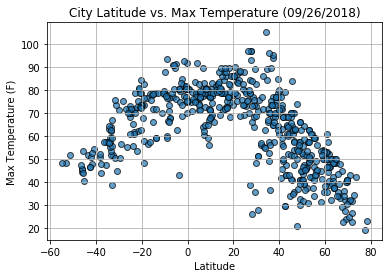

In [171]:
date = time.strftime("%m/%d/%Y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.yticks(np.arange(20, 110, 10))
plt.grid(True)

#### Latitude vs. Humidity Plot

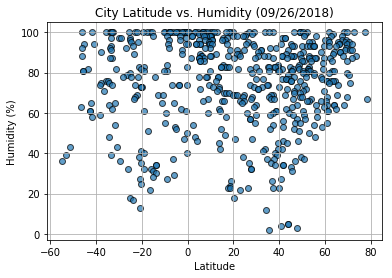

In [172]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

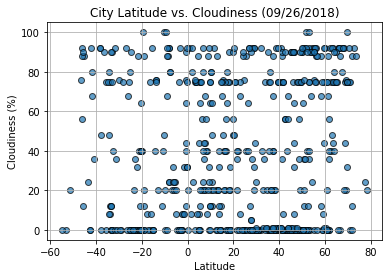

In [173]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

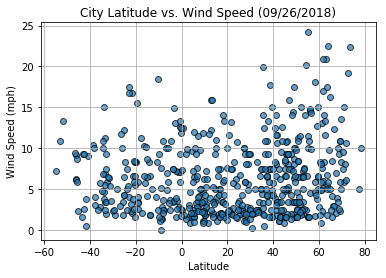

In [174]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)